In [1]:
%matplotlib inline

In [ ]:
import sys
sys.path

['/workspaces/ennf-fork/toy_mlp/toy_segmentation',
 '/home/codespace/.python/current/lib/python310.zip',
 '/home/codespace/.python/current/lib/python3.10',
 '/home/codespace/.python/current/lib/python3.10/lib-dynload',
 '',
 '/home/codespace/.local/lib/python3.10/site-packages',
 '/home/codespace/.python/current/lib/python3.10/site-packages']

In [9]:
sys.path.append('/workspaces/ennf-fork')

In [10]:
from nn_lib.mdl.loss_functions import CELoss, BCELoss_logits
from nn_lib.optim import Adam, Optimizer
from nn_lib.data import Dataloader

In [11]:
from toy_mlp.toy_segmentation.model_trainer import UNetTrainer
from toy_mlp.mnist_classifier.mnist_mlp_classifier import MnistMLPClassifier
from toy_mlp.toy_segmentation.unet import UNet
from toy_mlp.toy_segmentation.small_unet import SmallUNet
from toy_mlp.toy_segmentation.small_unet_1 import SmallUNet1
from toy_mlp.history_plotter import plot_loss
from toy_mlp.toy_segmentation.PH2_dataset import PH2

from nn_lib.scheduler.multi_step_lr import MultiStepLR

In [12]:
from nn_lib.support_func import iou_score
from nn_lib import Tensor

In [13]:
import numpy as np


In [23]:
a = val_dataset.labels[:25]

In [24]:
a.shape

(25, 16, 16, 1)

In [28]:
a.dtype

dtype('bool')

In [38]:
b1 = a.copy()
b1[:,:,7:] = False

In [39]:
iou_score(Tensor(a,requires_grad=False),Tensor(b1,requires_grad=False)).mean()

0.24

In [44]:
n_epochs=10
optim: Optimizer = Adam
batch_size=25
milestones=[]

In [41]:
# generate a training dataset
size = (16,16)
#size = (32,32)
train_dataset = PH2(ds_type='train',size=size)
# generate a validation dataset different from the training dataset
val_dataset = PH2(ds_type='val',size=size)
# create a dataloader for training data with shuffling and dropping last batch
train_dataloader = Dataloader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
# create a dataloader for validation dataset without shuffling or last batch dropping
val_dataloader = Dataloader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=False)

/workspaces/ennf-fork/toy_mlp/toy_segmentation/PH2Dataset


/workspaces/ennf-fork/toy_mlp/toy_segmentation/PH2Dataset


In [48]:
mlp_model = SmallUNet1(kernum=64)
print(f'Created the following binary MLP classifier:\n{mlp_model}')
# create loss function
loss_fn = BCELoss_logits() #CELoss()
# create optimizer for model parameters
optimizer = optim(mlp_model.parameters(), lr=1e-2, weight_decay=5e-4)
scheduler = MultiStepLR(optimizer, milestones=milestones, gamma=0.5)
# create a model trainer
model_trainer = UNetTrainer(mlp_model, loss_fn, optimizer, scheduler=scheduler)

Created the following binary MLP classifier:
[<nn_lib.mdl.layers.convolution_2d.Conv2d object at 0x7f0487e3fdc0>, <nn_lib.mdl.layers.relu.Relu object at 0x7f046f10d3f0>, <nn_lib.mdl.layers.convolution_2d.Conv2d object at 0x7f046f10f1f0>, <nn_lib.mdl.layers.relu.Relu object at 0x7f046dae9a20>]
[<nn_lib.mdl.layers.convolution_2d.Conv2d object at 0x7f0487e3fc10>, <nn_lib.mdl.layers.relu.Relu object at 0x7f0487e3f9a0>, <nn_lib.mdl.layers.convolution_2d.Conv2d object at 0x7f0487e23280>, <nn_lib.mdl.layers.relu.Relu object at 0x7f0487e22110>]
[<nn_lib.mdl.layers.convolution_2d.Conv2d object at 0x7f0487e23940>, <nn_lib.mdl.layers.relu.Relu object at 0x7f0487e22da0>, <nn_lib.mdl.layers.convolution_2d.Conv2d object at 0x7f0487e23490>, <nn_lib.mdl.layers.relu.Relu object at 0x7f0487e234c0>]
Total number of parameters: 223873



Validation. Epoch: 3. Loss: 0.0243. Score: 0.0000: 3it [49:20, 986.87s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


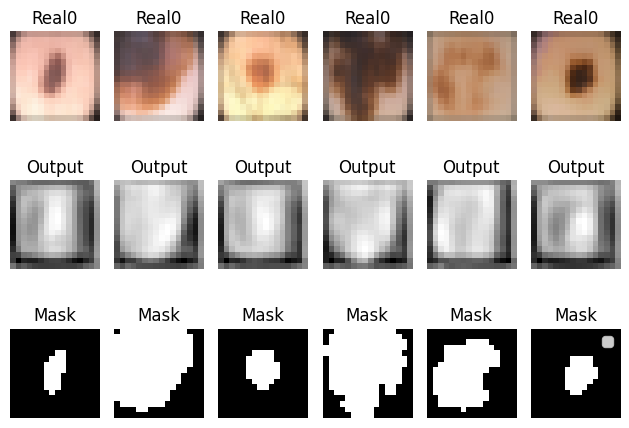


Validation. Epoch: 1. Loss: 0.0220. Score: 0.0000: 1it [14:00, 840.42s/it]


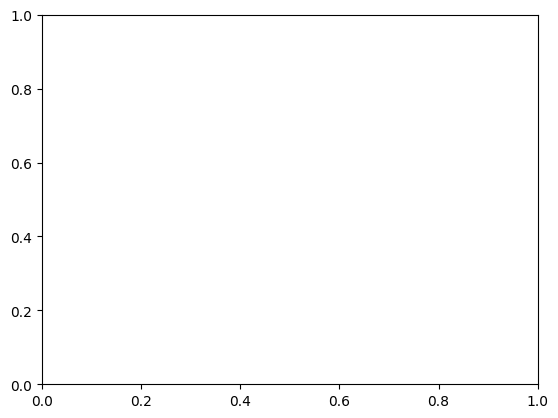

In [49]:
model_trainer.set_datasets(train_dataloader, val_dataloader)
model_trainer.train(1)

In [50]:
model_trainer.optimizer = Adam(mlp_model.parameters(), lr=1e-3, weight_decay=5e-4)
model_trainer.scheduler = None

0it [00:00, ?it/s]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


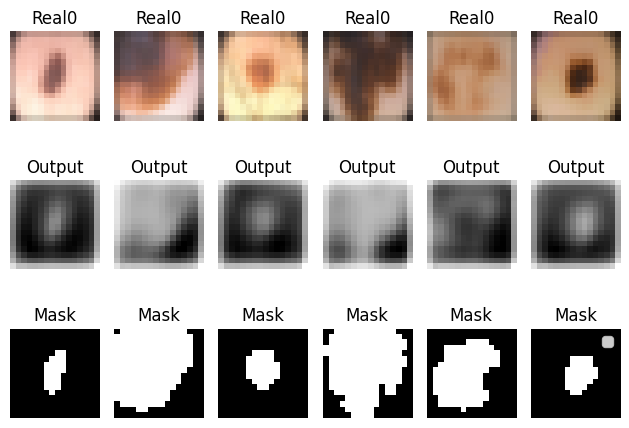

Validation. Epoch: 1. Loss: 0.0258. Score: 0.0000: 1it [14:05, 845.07s/it]


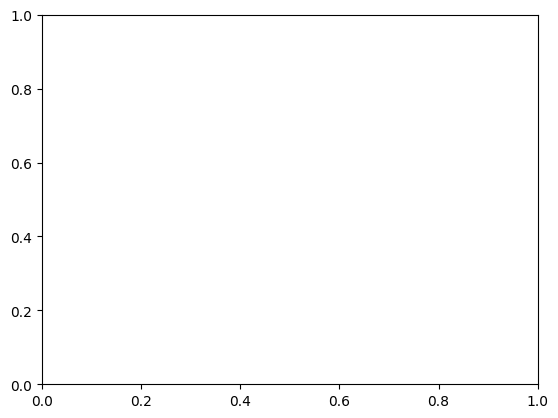

In [51]:
model_trainer.train(1)

In [52]:
model_trainer.optimizer = Adam(mlp_model.parameters(), lr=1e-3, weight_decay=5e-4)

0it [00:00, ?it/s]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


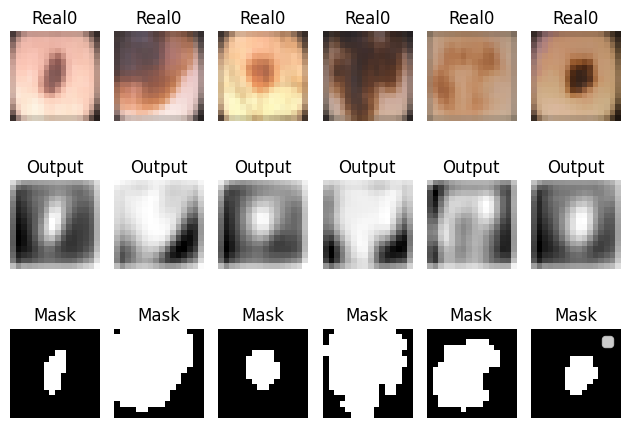

Validation. Epoch: 1. Loss: 0.0208. Score: 0.0000: 1it [14:00, 840.43s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


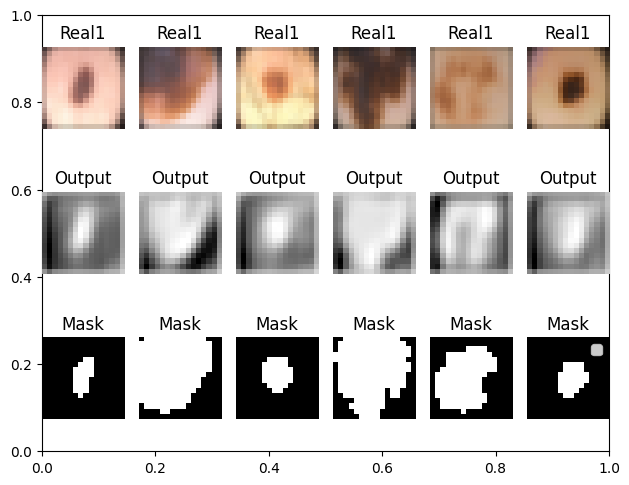

Validation. Epoch: 2. Loss: 0.0176. Score: 0.0000: 2it [27:56, 837.87s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


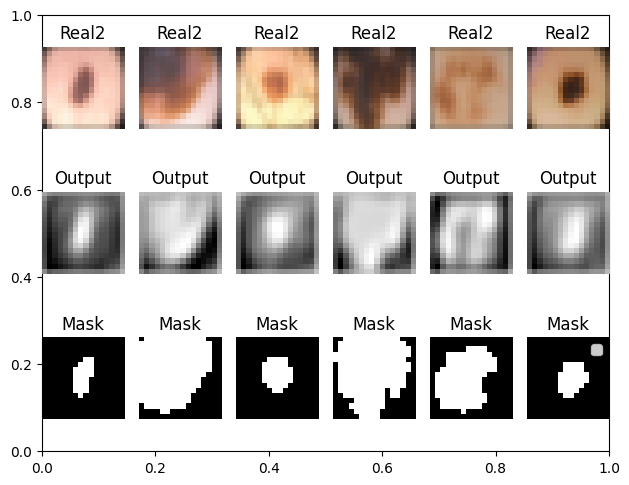

Validation. Epoch: 3. Loss: 0.0158. Score: 0.0000: 3it [41:59, 839.77s/it]


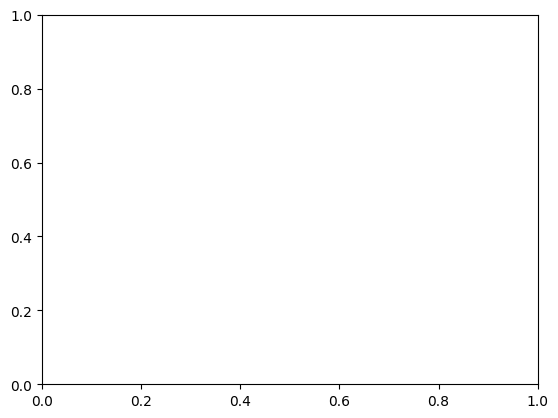

In [53]:
model_trainer.train(3)

0it [00:00, ?it/s]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


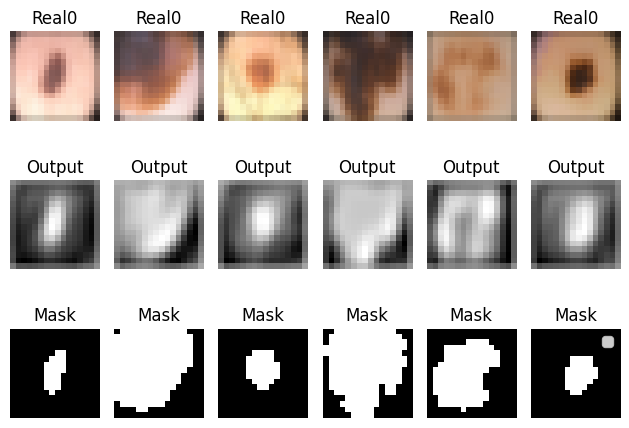

Validation. Epoch: 1. Loss: 0.0134. Score: 0.0000: 1it [14:01, 841.15s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


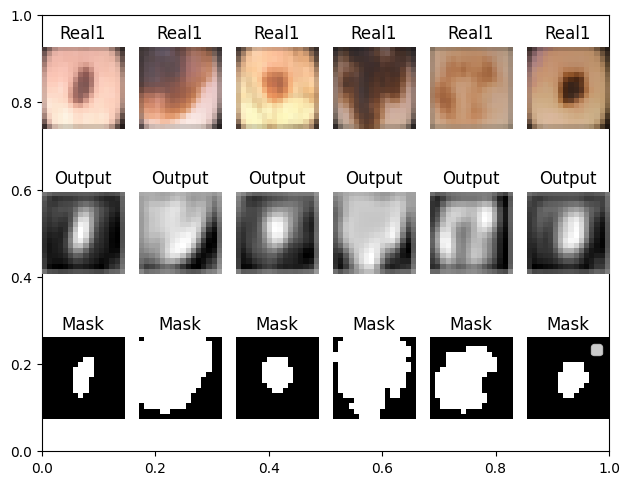

Validation. Epoch: 2. Loss: 0.0129. Score: 0.0000: 2it [27:28, 821.11s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


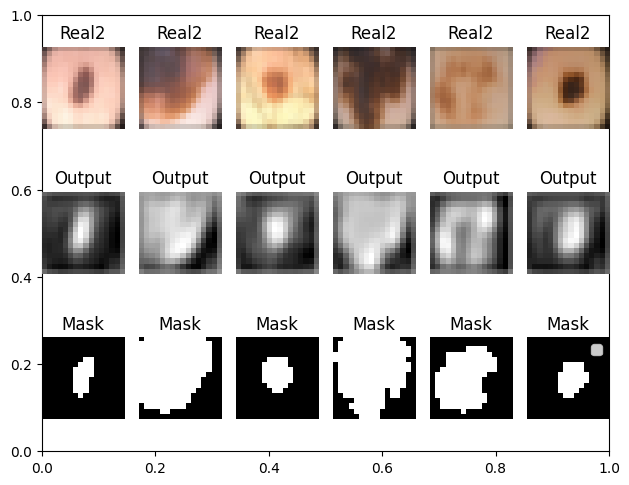

Validation. Epoch: 3. Loss: 0.0115. Score: 0.0000: 3it [40:55, 818.47s/it]


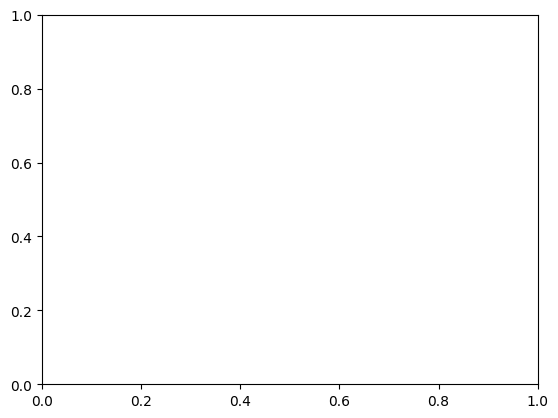

In [57]:
model_trainer.train(3)

In [58]:
model_trainer.optimizer = Adam(mlp_model.parameters(), lr=7*1e-4, weight_decay=5e-4)

0it [00:00, ?it/s]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


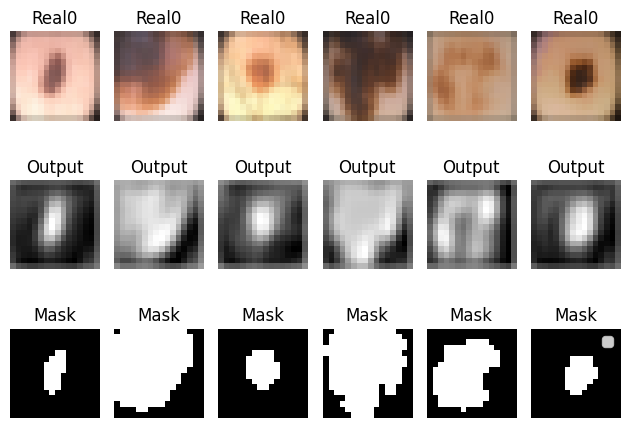

Validation. Epoch: 1. Loss: 0.0126. Score: 0.0000: 1it [13:26, 806.52s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


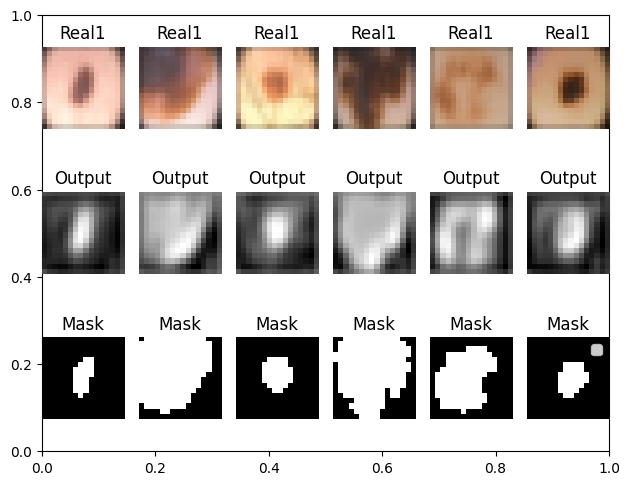

Validation. Epoch: 2. Loss: 0.0126. Score: 0.0000: 2it [26:57, 809.20s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


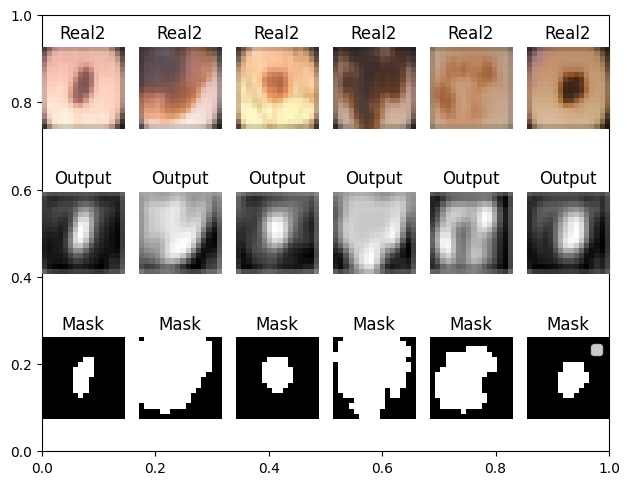

Validation. Epoch: 3. Loss: 0.0119. Score: 0.0000: 3it [40:25, 808.41s/it]


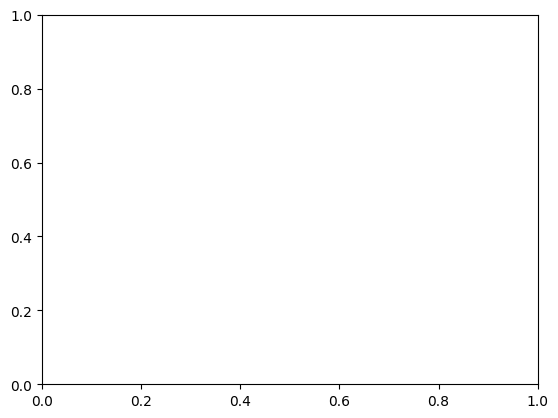

In [59]:
model_trainer.train(3)

In [60]:
model_trainer.optimizer = Adam(mlp_model.parameters(), lr=1e-4, weight_decay=5e-4)

0it [00:00, ?it/s]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


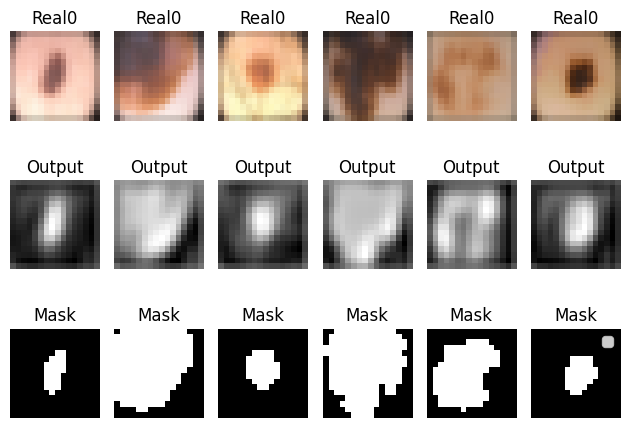

Validation. Epoch: 1. Loss: 0.0108. Score: 0.0000: 1it [13:27, 807.96s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


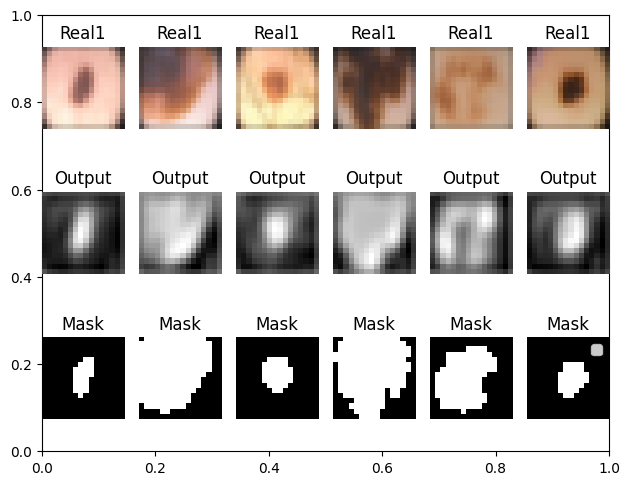

Validation. Epoch: 2. Loss: 0.0107. Score: 0.0000: 2it [27:00, 810.64s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


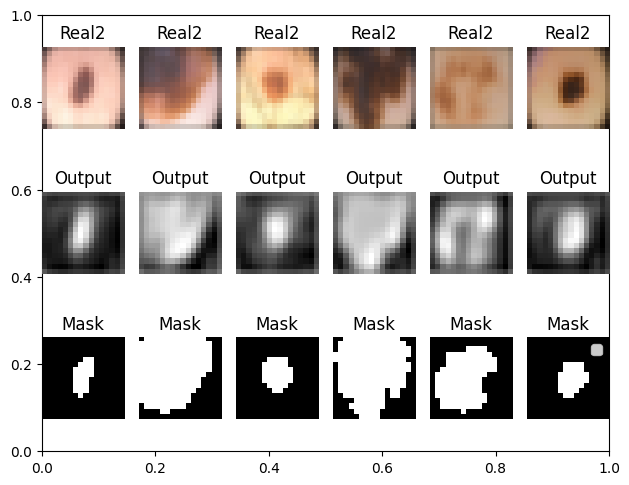

Validation. Epoch: 3. Loss: 0.0106. Score: 0.0000: 3it [40:37, 812.45s/it]


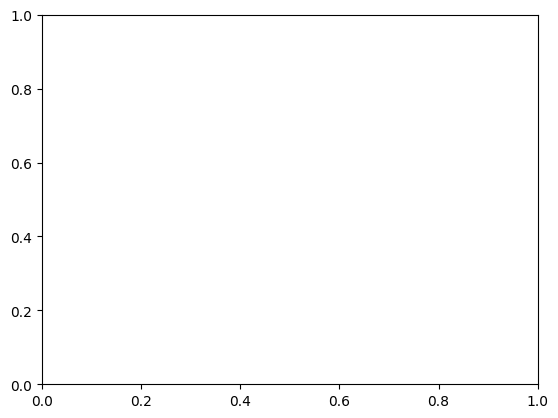

In [61]:
model_trainer.train(3)

In [62]:
model_trainer.optimizer = Adam(mlp_model.parameters(), lr=1e-5, weight_decay=5e-4)

0it [00:00, ?it/s]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


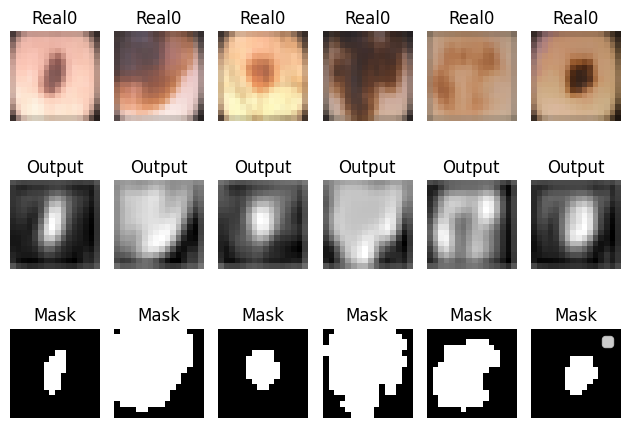

Validation. Epoch: 1. Loss: 0.0106. Score: 0.0000: 1it [13:29, 809.58s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


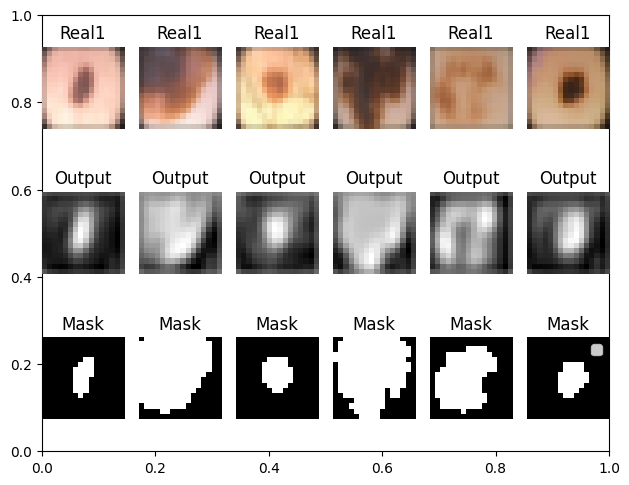

Validation. Epoch: 2. Loss: 0.0106. Score: 0.0000: 2it [26:59, 809.76s/it]


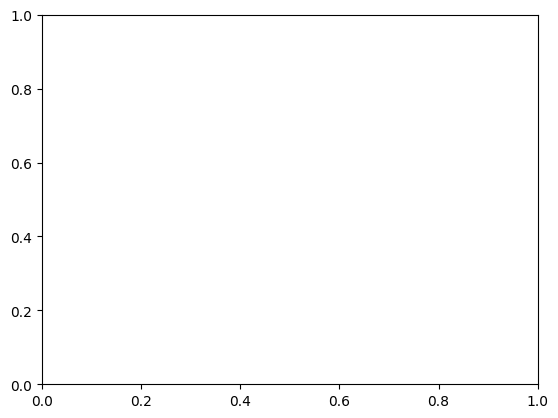

In [63]:
model_trainer.train(2)

In [64]:
model_trainer.optimizer = Adam(mlp_model.parameters(), lr=5*1e-4, weight_decay=5e-4)

0it [00:00, ?it/s]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


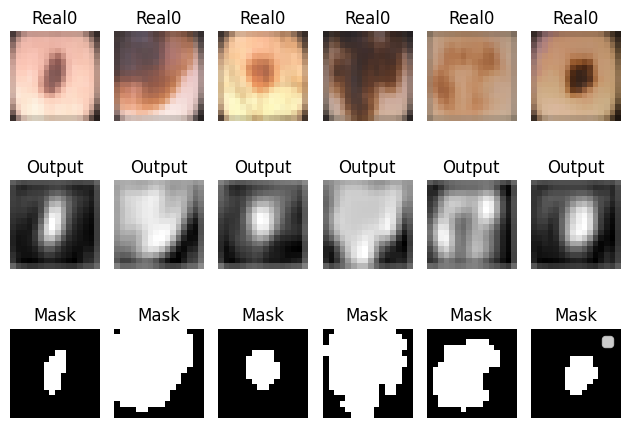

Validation. Epoch: 1. Loss: 0.0122. Score: 0.0000: 1it [13:27, 807.32s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


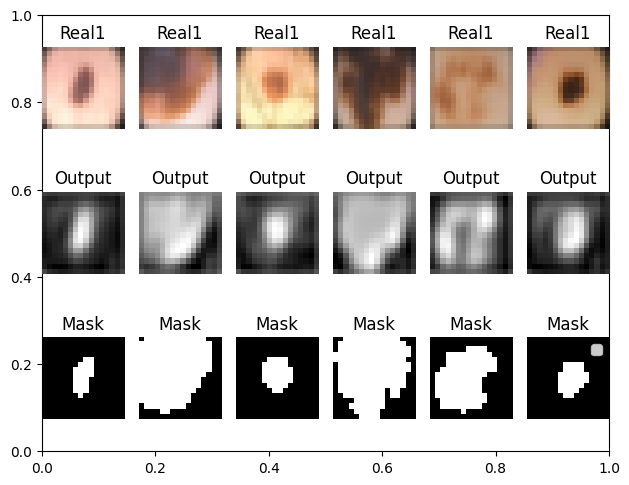

Validation. Epoch: 2. Loss: 0.0108. Score: 0.0000: 2it [26:56, 808.59s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


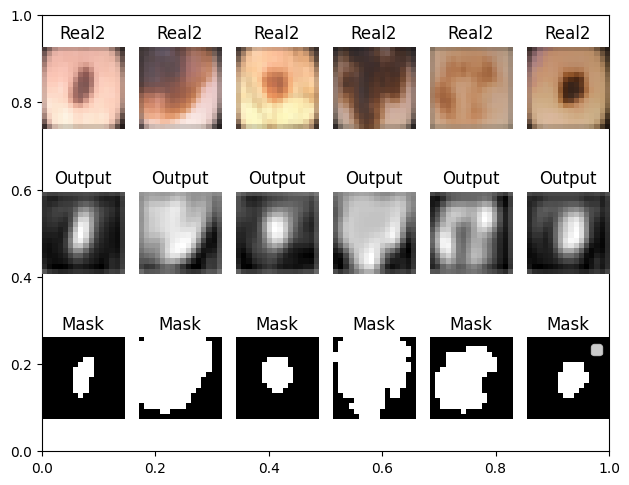

Validation. Epoch: 3. Loss: 0.0104. Score: 0.0000: 3it [40:26, 809.02s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


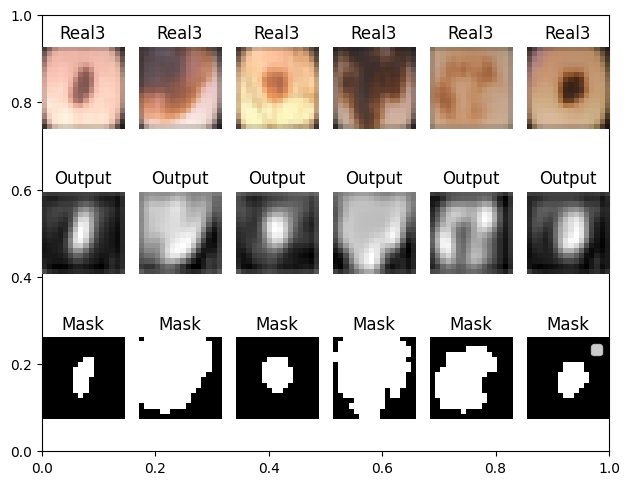

Validation. Epoch: 4. Loss: 0.0098. Score: 0.0000: 4it [53:53, 808.37s/it]

In [65]:
model_trainer.train(5)

Text(0, 0.5, 'val loss')

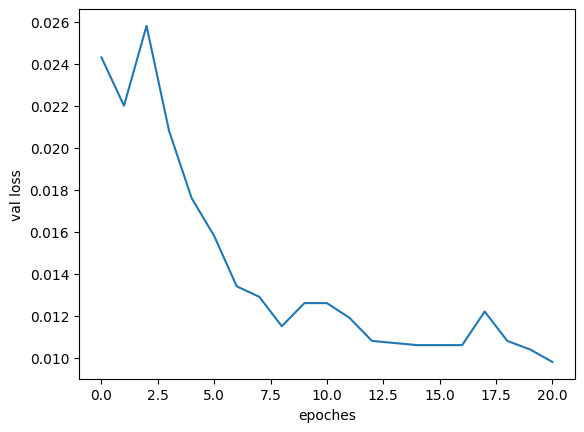

In [1]:
from matplotlib import pyplot as plt
val_loss = [
   0.0243,
0.0220,
0.0258,
0.0208,
0.0176,
0.0158,
0.0134,
0.0129,
0.0115,
0.0126,
0.0126,
0.0119,
0.0108,
0.0107,
0.0106,
0.0106,
0.0106,
0.0122,
0.0108,
0.0104,
0.0098 
]

plt.plot(val_loss)
plt.xlabel('epoches')
plt.ylabel('val loss')